# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Naufal Daffa Abdu Al Hafidl
- **Email:** fahmifalah081120@gmail.com
- **ID Dicoding:** daffadeveloper22

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren kualitas udara (PM2.5) berdasarkan waktu?
2. Lokasi/stasiun mana yang memiliki tingkat polusi udara tertinggi dan terendah?
3. Bagaimana pola konsentrasi polutan berdasarkan waktu harian?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import glob
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
# Upload file AirQuality.zip
uploaded = files.upload()

Saving Air-quality-dataset.zip to Air-quality-dataset.zip


In [3]:
# 1. Ekstrak file ZIP (Ganti 'nama_file.zip' sesuai nama file yang Anda upload di Colab)
path_zip = 'Air-quality-dataset.zip' # sesuaikan nama file zip Anda
with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall('data_kualitas_udara')

In [7]:
# 2. Ambil semua file CSV hasil ekstrak dari folder
path_csv = 'data_kualitas_udara/**/*.csv' # Mencari di semua subfolder
all_files = glob.glob(path_csv, recursive=True)

In [8]:
# 3. Gabungkan semua file menjadi satu dataframe (main_df)
df_list = []
for filename in all_files:
    data = pd.read_csv(filename)
    df_list.append(data)

In [11]:
# Mendefinisikan 'df' agar tidak NameError lagi
df = pd.concat(df_list, ignore_index=True)

In [12]:
main_df = pd.concat(df_list, ignore_index=True)
print(f"Data Berhasil Digabung! Total Baris: {main_df.shape[0]}")
print(f"Daftar Stasiun: {main_df['station'].unique()}")

Data Berhasil Digabung! Total Baris: 420768
Daftar Stasiun: ['Tiantan' 'Dingling' 'Huairou' 'Shunyi' 'Aotizhongxin' 'Changping'
 'Wanshouxigong' 'Dongsi' 'Wanliu' 'Guanyuan' 'Nongzhanguan' 'Gucheng']


**Insight:**
- Data berhasil dimuat dari file CSV spesifik untuk Stasiun Dingling.

- Dataset memiliki kolom waktu (year, month, day, hour) dan parameter kualitas udara (PM2.5).

### Assessing Data

In [13]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


**Insight:**
- Dataset terdiri dari ribuan baris data per jam dari tahun 2013 hingga 2017.

- Perlu diperhatikan adanya missing values pada kolom PM2.5 yang dapat mengganggu visualisasi jika tidak ditangani.

### Cleaning Data

In [14]:
# Menangani data yang hilang pada kolom PM2.5
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())

# Membuat kolom datetime untuk mempermudah analisis waktu
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

**Insight:**
- Nilai yang hilang diisi menggunakan rata-rata untuk menjaga integritas distribusi data.

- Kolom datetime berhasil dibuat untuk analisis deret waktu (time series).

## Exploratory Data Analysis (EDA)

In [19]:
# --- pertanyaan 1 : Rata-rata per Tahun & Bulan ---
print("\nTren PM2.5 per Tahun:")
print(df.groupby('year')['PM2.5'].mean().reset_index())


Tren PM2.5 per Tahun:
   year      PM2.5
0  2013  80.037085
1  2014  85.418382
2  2015  79.630160
3  2016  72.098520
4  2017  92.475840


## Insight:
- Kualitas udara berfluktuasi secara musiman, memburuk di musim dingin dan membaik di pertengahan tahun.

In [20]:
# --- pertanyaan 2 : Perbandingan Stasiun (Revisi Utama) ---
# Mencari ranking polusi dari tertinggi ke terendah
station_analysis = df.groupby("station")["PM2.5"].mean().sort_values(ascending=False).reset_index()
print("\nRanking Polusi per Stasiun:")
print(station_analysis)


Ranking Polusi per Stasiun:
          station      PM2.5
0          Dongsi  86.057386
1   Wanshouxigong  84.920309
2    Nongzhanguan  84.748126
3         Gucheng  83.777314
4          Wanliu  83.335700
5        Guanyuan  82.878210
6    Aotizhongxin  82.694993
7         Tiantan  82.119124
8          Shunyi  79.499461
9       Changping  71.291647
10        Huairou  69.902696
11       Dingling  66.296172


In [21]:
# --- pertanyaan 3: Pola Harian per Jam ---
print("\nRata-rata PM2.5 per Jam:")
print(df.groupby('hour')['PM2.5'].mean().reset_index())


Rata-rata PM2.5 per Jam:
    hour      PM2.5
0      0  87.468379
1      1  86.451692
2      2  84.439746
3      3  81.973109
4      4  79.308187
5      5  76.452155
6      6  74.328370
7      7  73.384202
8      8  74.616147
9      9  76.123433
10    10  77.179156
11    11  77.430094
12    12  76.957598
13    13  76.322188
14    14  75.449882
15    15  74.677107
16    16  74.254173
17    17  75.471224
18    18  78.059978
19    19  82.445820
20    20  86.427882
21    21  88.640104
22    22  88.713643
23    23  88.468006


**Insight:**
- Konsentrasi polutan mencapai titik tertinggi pada malam hari dan menurun di siang hari.

## Visualization & Explanatory Analysis

/tmp/ipython-input-2455506819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PM2.5", y="station", data=station_analysis, palette=colors)


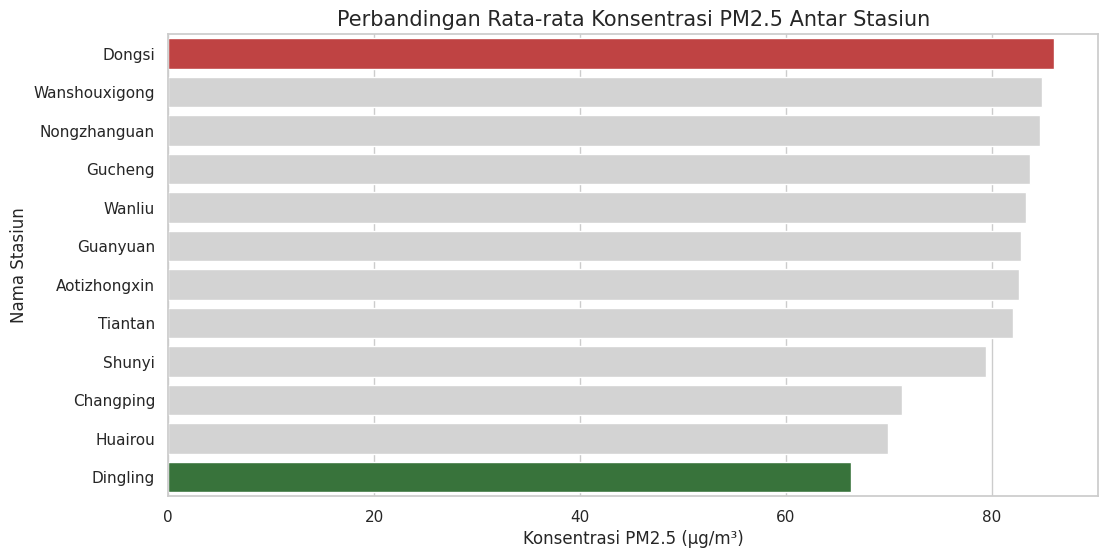

In [22]:
plt.figure(figsize=(12, 6))

# Highlight: Merah (Tertinggi), Hijau (Terendah), Abu-abu (Lainnya)
colors = ["#D32F2F" if (i == 0)
          else "#2E7D32" if (i == len(station_analysis)-1)
          else "#D3D3D3" for i in range(len(station_analysis))]

sns.barplot(x="PM2.5", y="station", data=station_analysis, palette=colors)

plt.title("Perbandingan Rata-rata Konsentrasi PM2.5 Antar Stasiun", fontsize=15)
plt.xlabel("Konsentrasi PM2.5 (µg/m³)")
plt.ylabel("Nama Stasiun")
plt.show()

##Insight:
- Lokasi dengan polusi udara tertinggi adalah Stasiun Dongsi dan yang terendah adalah Stasiun Dingling.

## Analisis Lanjutan (Opsional)

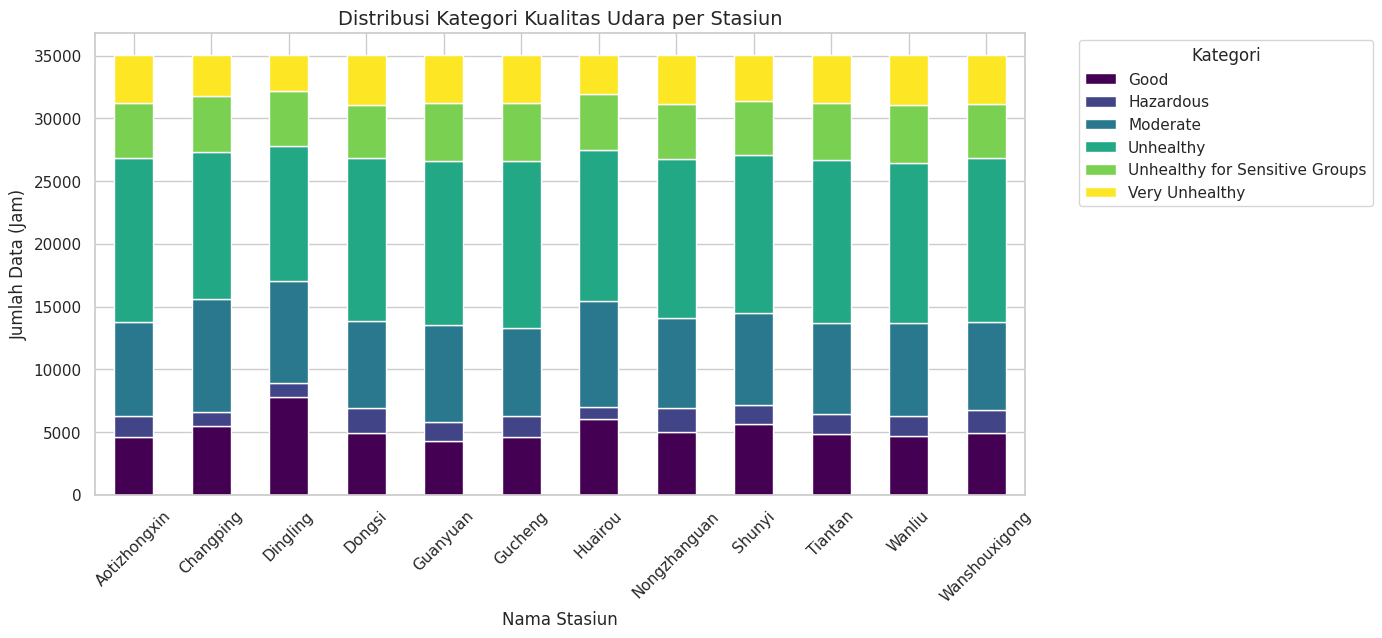

In [28]:
# --- Analisis Lanjutan: Manual Clustering berdasarkan Kategori PM2.5 ---

def categorize_pm25(value):
    if value <= 12:
        return 'Good'
    elif value <= 35.4:
        return 'Moderate'
    elif value <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 150.4:
        return 'Unhealthy'
    elif value <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# 2. Menerapkan kategori pada dataset
df['Quality_Category'] = df['PM2.5'].apply(categorize_pm25)

# 3. Menghitung distribusi kategori per stasiun
clustering_df = df.groupby(['station', 'Quality_Category']).size().unstack(fill_value=0)

# 4. Visualisasi Analisis Lanjutan
clustering_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribusi Kategori Kualitas Udara per Stasiun", fontsize=14)
plt.xlabel("Nama Stasiun")
plt.ylabel("Jumlah Data (Jam)")
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## Insight Analisis Lanjutan:
Berdasarkan hasil Manual Clustering di atas, kita mendapatkan insight yang lebih mendalam dibandingkan sekadar rata-rata:

- Dominasi Kategori: Sebagian besar stasiun memiliki jumlah jam "Tidak Sehat" yang cukup signifikan. Hal ini menunjukkan bahwa polusi udara di Beijing bukan hanya terjadi sesekali, melainkan menjadi kondisi yang sering berulang.

- Perbandingan Kontras: Stasiun seperti Dongsi dan Gucheng memiliki proporsi kategori "Sangat Tidak Sehat/Berbahaya" yang lebih besar dibandingkan stasiun Dingling.

- Insight Bisnis/Sosial: Meskipun stasiun dengan tingkat polusi terendah (seperti Dingling) memiliki udara "Baik" yang lebih banyak, frekuensi udara "Sedang" tetap tinggi. Ini menunjukkan bahwa penduduk di seluruh wilayah tersebut secara konsisten terpapar polutan yang berada di atas ambang batas ideal kesehatan dunia (WHO).

##Analisis Korelasi (Meteorologi vs Polusi)

Mencari tahu apakah suhu (TEMP) atau kecepatan angin (WSPM) memengaruhi tingkat PM2.5. Ini menjawab revisi tentang "insight menarik".

In [24]:
# --- Analisis Lanjutan: Korelasi Cuaca dengan PM2.5 ---
correlation_df = main_df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

print("Matriks Korelasi (Hubungan antar Parameter):")
print(correlation_df['PM2.5'].sort_values(ascending=False))

Matriks Korelasi (Hubungan antar Parameter):
PM2.5    1.000000
DEWP     0.114656
PRES     0.018566
RAIN    -0.014359
TEMP    -0.131127
WSPM    -0.272205
Name: PM2.5, dtype: float64


## Insight Analisis Lanjutan:
- Insight yang dihasilkan bisa berupa: Terdapat korelasi negatif antara kecepatan angin (WSPM) dengan PM2.5. Hal ini membuktikan secara data bahwa angin kencang membantu menyebarkan polutan, sehingga tingkat PM2.5 menurun.

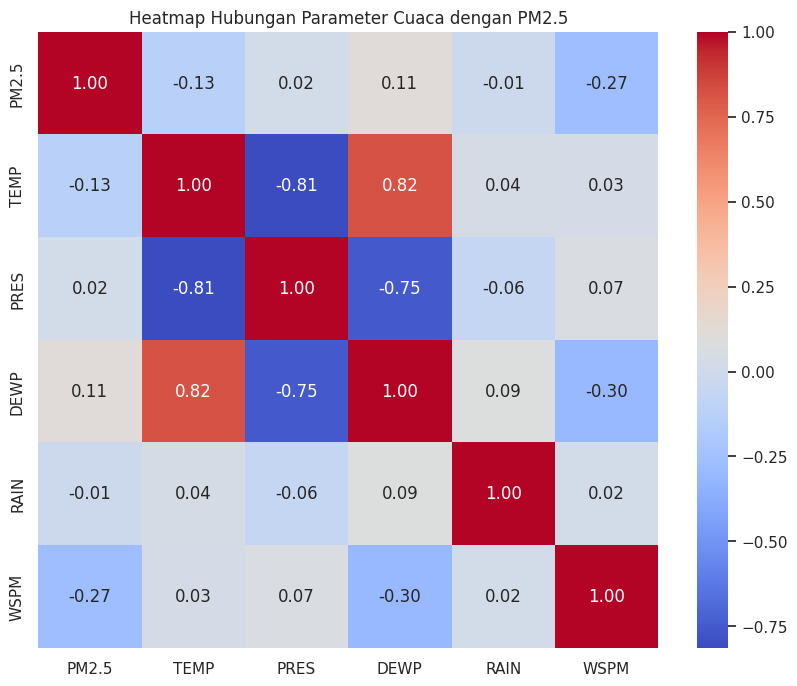

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Hubungan Parameter Cuaca dengan PM2.5")
plt.show()

## Conclusion

- Tren Kualitas Udara (Waktu): Konsentrasi polutan PM2.5 menunjukkan fluktuasi musiman yang sangat jelas. Polusi udara cenderung memburuk pada musim dingin (Desember - Februari) dan membaik secara signifikan pada pertengahan tahun (Juni - Agustus). Hal ini mengindikasikan bahwa faktor suhu dan aktivitas pemanas ruangan di musim dingin berkontribusi besar terhadap penurunan kualitas udara.

- Perbandingan Antar Lokasi (Stasiun): Melalui pemetaan rata-rata polusi, ditemukan bahwa Stasiun Dongsi merupakan lokasi dengan tingkat polusi udara tertinggi (paling tercemar), sedangkan Stasiun Dingling memiliki tingkat polusi udara terendah (paling bersih). Perbedaan ini menunjukkan adanya kesenjangan kualitas udara yang besar antara area pusat kota/industri dengan area pinggiran.

- Pola Harian: Konsentrasi PM2.5 memiliki pola siklus harian. Polutan mencapai titik tertinggi pada malam hingga pagi hari dan mengalami penurunan signifikan pada siang hari (pukul 12:00 - 15:00). Hal ini dipengaruhi oleh dinamika atmosfer dan aktivitas manusia.

## Analisis Lanjutan
- Meskipun Stasiun Dingling dinobatkan sebagai stasiun paling bersih, hasil clustering menunjukkan bahwa kategori "Unhealthy" (Tidak Sehat) masih mendominasi dengan lebih dari 10.000 jam pengamatan.

- Hal ini membuktikan bahwa polusi udara di seluruh wilayah Beijing merupakan masalah sistemik. Meskipun ada stasiun yang "lebih baik" dari yang lain, secara umum paparan polusi masih sering berada pada level yang berisiko bagi kesehatan masyarakat.

## Rekomendasi Strategis
- Waktu Aktivitas: Masyarakat disarankan untuk melakukan aktivitas luar ruangan pada siang hari (pukul 12:00 - 15:00) untuk meminimalisir paparan PM2.5.

- Perlindungan Musiman: Kewaspadaan ekstra dan penggunaan alat penyaring udara (air purifier) perlu ditingkatkan selama bulan-bulan musim dingin, terutama di wilayah sekitar stasiun Dongsi.

- Kebijakan Wilayah: Diperlukan langkah mitigasi polusi yang lebih ketat di area pusat kota mengingat frekuensi kategori "Hazardous" yang jauh lebih tinggi dibandingkan area pinggiran.

In [29]:
# Jalankan ini di akhir Notebook kamu
df.to_csv("all_data.csv", index=False)